<a id='home'></a>
### purpose

create figures to visualize validation of Gradient Forests, combine RONA and non-genetic validation scores

### outline

1. [load phenotype data to get number of populations going into rho2 calculation](#pheno)
1. [load GF validation scores](#gf)
    - load validation scores from ../11_validate_GF_offset_predictions.ipynb
1. [load climate and geographic validation scores](#climategeo)
1. [load RONA validation scores](#rona)
1. [create figures](#figs)
    - [jack pine](#jack)
    - [douglas-fir](#doug)

In [13]:
from pythonimports import *
from myfigs import save_pdf

import matplotlib
import seaborn as sns
import adjustText
from adjustText import adjust_text
adjustText.version = '0.7.3'  # workaround so session_info picks up version

ronadir = '/data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona'
rona_figdir = makedir(op.join(ronadir, 'figs'))

# from ../11_validate_GF_offset_predictions
txtdir = '/data/projects/pool_seq/phenotypic_data/offset_misc_files/results/gradient_forests'

figdir = makedir('/data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation')

t1 = dt.now()  # notebook timer

latest_commit()
session_info.show()

##################################################################
Current commit of pythonimports:
commit 9f2b6d7984dd7a121d365ff406e02c14cafd5560  
Author: Brandon Lind <brandon.lind@ubc.ca>  
Date:   Fri Apr 22 13:34:17 2022 -0600
Today:	May 19, 2022 - 09:40:13
python version: 3.8.5
##################################################################



<a id='pheno'></a>
# load phenotype data to get number of populations going into rho2 calculation

code is from ../10_RONA_figs.ipynb which is from ../09_RONA.ipynb 

[top](#home)

In [14]:
# all files
jpphenodir = '/data/projects/pool_seq/pangenome/JP_pangenome/JP_pooled/phenotypes'
dfphenodir = '/data/projects/pool_seq/phenotypic_data/doug-fir'

envfiles = {
    'jp' : '/data/projects/pool_seq/environemental_data/jp_rm_p24/jp_no-p24_raw_env-19variables.txt',
    'fdi' : '/data/projects/pool_seq/environemental_data/change_p6/df_interior-naturalpops_raw_env-19variables_change-p6.txt',
    'fdc' : '/data/projects/pool_seq/environemental_data/change_p6/df_coastal-naturalpops_raw_env-19variables_change-p6.txt',
    'combined' : '/data/projects/pool_seq/environemental_data/change_p6/df_ALL-naturalpops_raw_env-19variables_change-p6.txt'
}

##### jack pine 

In [15]:
# jack pine
envdata = {}
envdata['jp'] = pd.read_table(envfiles['jp'])
envdata['jp'].index = envdata['jp']['our_id'].tolist()
envdata['jp'].head()

,id1,id2,our_id,LAT,LONG,Elevation,AHM,CMD,DD5,DD_0,EMT,EXT,Eref,FFP,MAP,MAT,MCMT,MSP,MWMT,NFFD,PAS,SHM,TD,bFFP,eFFP,group_color
JP_p98,9150251,38,JP_p98,54.3333,-106.6333,537,21.2,181,1273,2217,-46.0,34.7,534,103,461,-0.2,-20.1,305,16.6,149,129,54.4,36.7,148,251,green
JP_p73,3273,22,JP_p73,44.4200,-84.6800,359,22.0,241,1956,835,-34.1,36.6,745,131,732,6.1,-8.0,395,19.8,163,140,50.0,27.8,141,271,blue
JP_p97,8060006,37,JP_p97,56.1167,-116.9167,636,23.5,242,1188,2009,-44.3,34.8,556,90,432,0.2,-19.8,272,15.4,138,133,56.5,35.1,151,241,green
JP_p60,3260,17,JP_p60,46.7200,-84.3900,203,16.5,135,1557,1116,-36.8,34.3,599,123,848,4.0,-10.7,397,17.6,156,265,44.2,28.3,147,271,blue
JP_p100,9040116,40,JP_p100,55.7667,-97.8167,205,13.3,130,1003,2956,-49.7,35.2,448,82,506,-3.3,-24.9,315,15.7,106,191,49.9,40.6,163,245,green


In [16]:
# jack pine phenotype

# get the common garden files for jack pine
jpfiles = fs(jpphenodir, 'cg-data_provpops')

phenos = ['Mortality_2018', 'Mean_Height_2018', 'Mean_DBH2018']

jpdata = {}
for f in jpfiles:
    garden = f.split("_")[-1].rstrip('.txt')
    if garden == 'petawawa':
        continue
    elif garden == 'st-christine':
        garden = 'christine'  # match name in `cgdata.index`
    jpdata[garden] = pd.read_table(f)
    jpdata[garden].index = jpdata[garden]['our_id'].tolist()
    jpdata[garden] = jpdata[garden][phenos]
    print(garden, nrow(jpdata[garden]))

jpdata[garden].head()

fontbrune 27
christine 28


,Mortality_2018,Mean_Height_2018,Mean_DBH2018
JP_p4,70.0,1799.09,228.00
JP_p6,64.0,1856.67,239.60
JP_p8,58.0,1988.95,259.63
JP_p14,72.0,1636.67,211.83
JP_p20,88.0,1578.33,218.50


##### doug-fir

In [17]:
# doug-fir pop data

# map prov ID to our ID to translate pop names in phenotype data below
envdata['combined'] = pd.read_table(envfiles['combined'])
envdata['combined'].index = envdata['combined']['our_id'].tolist()
provdict = dict(zip(envdata['combined']['prov'], envdata['combined']['our_id']))
print(provdict)

{1: 'DF_p1', 2: 'DF_p2', 3: 'DF_p3', 4: 'DF_p4', 5: 'DF_p5', 6: 'DF_p6', 7: 'DF_p7', 8: 'DF_p8', 9: 'DF_p9', 10: 'DF_p10', 11: 'DF_p11', 12: 'DF_p12', 13: 'DF_p13', 14: 'DF_p14', 15: 'DF_p15', 16: 'DF_p16', 17: 'DF_p17', 18: 'DF_p18', 19: 'DF_p19', 20: 'DF_p20', 23: 'DF_p23', 24: 'DF_p24', 25: 'DF_p25', 26: 'DF_p26', 27: 'DF_p27', 28: 'DF_p28', 29: 'DF_p29', 30: 'DF_p30', 31: 'DF_p31', 32: 'DF_p32', 33: 'DF_p33', 34: 'DF_p34', 35: 'DF_p35', 36: 'DF_p36', 37: 'DF_p37', 38: 'DF_p38', 39: 'DF_p39', 40: 'DF_p40', 41: 'DF_p41', 42: 'DF_p42', 43: 'DF_p43', 44: 'DF_p44', 45: 'DF_p45', 46: 'DF_p46', 47: 'DF_p47', 48: 'DF_p48', 49: 'DF_p49', 50: 'DF_p50', 51: 'DF_p51', 52: 'DF_p52', 53: 'DF_p53', 54: 'DF_p54', 55: 'DF_p55', 56: 'DF_p56', 57: 'DF_p57', 58: 'DF_p58', 59: 'DF_p59', 60: 'DF_p60', 61: 'DF_p61', 62: 'DF_p62', 72: 'DF_p72', 73: 'DF_p73', 74: 'DF_p74', 75: 'DF_p75', 76: 'DF_p76', 77: 'DF_p77', 78: 'DF_p78', 79: 'DF_p79', 80: 'DF_p80', 81: 'DF_p81', 82: 'DF_p82', 83: 'DF_p83', 84: 'DF_p

In [18]:
# doug-fir 
_phenodata = pd.read_excel('/data/projects/pool_seq/phenotypic_data/doug-fir/Data_Totem_Blups_Nov_17_2021_Brandon.xlsx')  # new pheno
_phenodata = _phenodata[_phenodata['Prov'].isin(keys(provdict))]
assert nrow(_phenodata) == nrow(envdata['combined'])
_phenodata.index = _phenodata['Prov'].map(provdict)
_phenodata.index.name = None
print(sum(envdata['combined'].index.isin(_phenodata.index)))

# blups = _phenodata[['blup_increment', 'blup_shoot_biomass']].copy()
dfdata = _phenodata[['blup_increment', 'blup_shoot_biomass']].copy()





73


In [19]:
# coastal
envdata['fdc'] = envdata['combined'][envdata['combined']['Variety']=='FDC'].copy()

nrow(envdata['fdc'])

38

In [20]:
# interior
envdata['fdi'] = envdata['combined'][envdata['combined']['Variety']=='FDI'].copy()

nrow(envdata['fdi'])

35

In [21]:
assert nrow(envdata['fdi']) + nrow(envdata['fdc']) == nrow(envdata['combined'])

##### bundle

In [22]:
# bundle phenotype data into dict
phenodata = {'jp' : jpdata,
             'fdi' : {'vancouver' : dfdata[dfdata.index.isin(envdata['fdi'].index)].copy()},
             'fdc' : {'vancouver' : dfdata[dfdata.index.isin(envdata['fdc'].index)].copy()},
             'combined' : {'vancouver' : dfdata}
            }

<a id='gf'></a>
# load GF validation scores

[top](#home)

In [23]:
# from ../11_validate_GF_offset_predictions
# load calculations
for obj in pbar(['offsets',
                 'validation_scores', 'validation_scores_twovariety', 'validation_scores_interior',
                 'cv', 'cv_twovariety', 'cv_interior',
                 'cv_scores', 'cv_scores_interior', 'cv_scores_twovariety']):
    
    pkl = op.join(txtdir, f'{obj}.pkl')
    
    globals()[obj] = pklload(pkl)

100%|███████████████| 10/10 [00:00<00:00, 110.87it/s]


In [24]:
def get_remaining_stats(_dict, garden, _spp, dataset, kfold, pheno):
    stats = []
    for i,statistic in enumerate(statistics):
        val = _dict[statistic][garden][_spp][dataset][kfold][pheno][0]
        stats.append(val)
    return stats

# convert nested dictionary to dataframe in similar format as the `rona_cordf`
primary_cols = ['spp', 'garden', 'model', 'method', 'setname', 'pheno', 'dataset', 'source', 'kfold']
statistics = ['pearson', 'spearman', 'rmse', 'rmse_mean', 'rmse_iq']

validation_df = pd.DataFrame(columns=primary_cols + statistics)

for _dict,dictname in zip([validation_scores, validation_scores_twovariety, validation_scores_interior],
                          ['validation_scores', 'validation_scores_twovariety', 'validation_scores_interior']):
    for garden,sppdict in _dict['pearson'].items():
        for _spp,datadict in sppdict.items():
            spp = _spp.split("-")[0]
            for dataset,kdict in datadict.items():
                method, setname = dataset.split('-')
                for kfold,phenodict in kdict.items():
                    for pheno,(pearson, pval) in phenodict.items():
                        stats = get_remaining_stats(_dict, garden,_spp,dataset,kfold,pheno)
                        validation_df.loc[nrow(validation_df)] = (
                            (spp, garden, _spp, method, setname, pheno, dataset, dictname, kfold, *stats)
                        )
validation_df.head()

,spp,garden,model,method,setname,pheno,dataset,source,kfold,pearson,spearman,rmse,rmse_mean,rmse_iq
0,combined,vancouver,combined,baypass,pseudo_random_loci,blup_increment,baypass-pseudo_random_loci,validation_scores,full,-0.8902,-0.8763,26.4770,1.0469,1.8842
1,combined,vancouver,combined,baypass,pseudo_random_loci,blup_shoot_biomass,baypass-pseudo_random_loci,validation_scores,full,-0.8791,-0.8553,10.0214,1.1270,1.2323
2,combined,vancouver,combined,baypass,pseudo_random_loci,blup_increment,baypass-pseudo_random_loci,validation_scores,k1,-0.8589,-0.8070,26.3734,1.0527,1.6590
3,combined,vancouver,combined,baypass,pseudo_random_loci,blup_shoot_biomass,baypass-pseudo_random_loci,validation_scores,k1,-0.8900,-0.8018,10.0868,1.1382,1.1866
4,combined,vancouver,combined,baypass,pseudo_random_loci,blup_increment,baypass-pseudo_random_loci,validation_scores,k2,-0.8511,-0.8431,25.0899,1.0458,2.4035


In [25]:
# for creating figures
spp_groups = {
    'doug-fir' : ['combined', 'fdc', 'fdi', 'western', 'eastern'],
    'jack' : ['jp']
}

<a id='climategeo'></a>
# load climate and geographic validation scores

[top](#home)

In [26]:
# read in climatic and geographic distances to common garden
climate_geodf = pd.read_table('/data/projects/pool_seq/phenotypic_data/offset_misc_files/results/climate_geo_dist/climate_geo_dist.txt')
climate_geodf.head()

,spp,garden,pheno,distance_metric,spearman,pearson,rmse,rmse_mean,rmse_iq
0,jp,fontbrune,Mortality_2018,mahal_fontbrune_all,0.1629,0.1981,1011.5994,14.6138,60.5748
1,jp,fontbrune,Mortality_2018,mahal_fontbrune_cbst,0.2025,0.2914,52.4760,0.7581,3.1423
2,jp,fontbrune,Mortality_2018,mahal_fontbrune_cgdata,0.1222,0.1289,65.8580,0.9514,3.9436
3,jp,fontbrune,Mortality_2018,vincenty_fontbrune,0.3060,0.4158,919.2295,13.2794,55.0437
4,jp,fontbrune,Mean_Height_2018,mahal_fontbrune_all,-0.2503,-0.2385,536.6528,0.3355,4.9679


<a id='rona'></a>
# load RONA validation scores

and sig environments (see ../09_RONA.ipynb)

[top](#home)

In [27]:
# read in RONA info
efdict = pklload(op.join(ronadir, 'efdict.pkl'))

cordf = pd.read_table(op.join(ronadir, 'correlations.txt'))
cordf.head()

,spp,garden,method,setname,pheno,env,spearman,pearson,rmse,rmse_mean,rmse_iq,dataset
0,jp,christine,baypass,real,Mortality_2018,Elevation,0.3801,0.3161,77.4930,1.0065,5.8596,baypass-real
1,jp,christine,baypass,real,Mean_Height_2018,Elevation,-0.1045,-0.1715,1878.5391,1.0018,15.3768,baypass-real
2,jp,christine,baypass,real,Mean_DBH2018,Elevation,0.1308,0.1103,234.0658,1.0023,8.9449,baypass-real
3,jp,christine,baypass,real,Mortality_2018,MAT,0.2615,0.2580,77.4842,1.0064,5.8589,baypass-real
4,jp,christine,baypass,real,Mean_Height_2018,MAT,-0.1817,-0.1670,1878.5304,1.0018,15.3767,baypass-real


<a id='figs'></a>
# make some figs

[top](#home)

In [28]:
def calc_conf_interval(rho, num_pops):
    """Calculate the 95% confidence interval around Spearman's rho from validation scores.
    
    Uses Fisher's transformation.
    
    thanks - https://stats.stackexchange.com/questions/18887/how-to-calculate-a-confidence-interval-for-spearmans-rank-correlation
    also - https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient#Determining_significance
    """
    stderr = 1 / math.sqrt(num_pops - 3)
    delta = 1.96 * stderr
    lower = (math.tanh(math.atanh(rho) - delta))
    upper = (math.tanh(math.atanh(rho) + delta))
    
    assert lower <= rho <= upper, (lower , rho , upper)
    
    return lower, upper


In [29]:
# a list of alphabetic characters to use as panel labels
panel_labels = list(string.ascii_uppercase)

# pretty names to label y-axes in figures
pretty_label = {'spearman' : "validation score (Spearman's $\\rho$)",
                'pearson' : "validation score (Pearson's $r$)"}


# pretty names to use to label non-genetic offsets
clim_names = {'mahal_christine_all' : 'all',
              'mahal_christine_cgdata' : 'prov',
              'mahal_christine_cbst' : 'CBST',
              'mahal_fontbrune_all' : 'all',
              'mahal_fontbrune_cgdata' : 'prov',
              'mahal_fontbrune_cbst' : 'CBST',
              'mahal_vancouver_all' : 'all',
              'mahal_vancouver_cgdata' : 'prov',
              'mahal_vancouver_cbst' : 'CBST',
              'vincenty_christine' : 'geo',
              'vincenty_fontbrune' : 'geo',
              'vincenty_vancouver' : 'geo'}

# colors to use in figures
clim_colors = {'mahal_christine_all' : 'blue',
               'mahal_christine_cgdata' : 'dodgerblue',
               'mahal_christine_cbst' : 'deepskyblue',
               'mahal_fontbrune_all' : 'blue',
               'mahal_fontbrune_cgdata' : 'dodgerblue',
               'mahal_fontbrune_cbst' : 'deepskyblue',
               'mahal_vancouver_all' : 'blue',
               'mahal_vancouver_cgdata' : 'dodgerblue',
               'mahal_vancouver_cbst' : 'deepskyblue',
               'vincenty_christine' : 'darkred',
               'vincenty_fontbrune' : 'darkred',
               'vincenty_vancouver' : 'darkred'}
set_colors = dict(
    zip(['baypass-real', 'baypass-pseudo_random_loci', 'baypass-random',
         'wza-real', 'wza-pseudo_random_loci', 'wza-random'],
        sns.color_palette()
       )
)

def pretty_pheno(pheno):
    """Update phenotype name to print pretty for figures."""
    pheno_dict = {
        'Mortality_2018' : 'Mortality',
        'Mean_Height_2018' : 'Mean Height',
        'Mean_DBH2018' : 'Mean DBH',
        'blup_increment' : 'Height Increment',
        'blup_shoot_biomass' : 'Shoot Biomass'
    }
    return pheno_dict[pheno]


def reduce_df(df, spp=None, spps=None, pheno=None, garden=None, envs=None, model=None):
    """Reduce a dataframe containing validation information based on kwargs."""
    if spp is not None:
        df = df[df['spp']==spp].copy()
    if pheno is not None:
        df = df[df['pheno']==pheno].copy()
    if garden is not None:
        df = df[df['garden']==garden].copy()
    if spps is not None:
        df = df[df['spp'].isin(spps)].copy()
    if envs is not None:
        df = df[df['env'].isin(envs)].copy()
    if model is not None:
        df = df[df['model']==model].copy()
    return df


# kwargs that are passed to adjustText.adjust_text
adj_kwargs=dict(
    force_points=(0, 3),
    force_text=(0, 0.5),
    autoalign='y',
    zorder=0
)


def setup_jp_fig(buffer=0.02):
    """Set up figure for jack pine."""
    fig, axes = plt.subplots(nrows=3,
                             ncols=6,
                             sharey=True,
                             gridspec_kw={'width_ratios': [3, 1, 3] * 2},
                             figsize=(13, 10))

    # add a buffer spacing in between the 3rd and 4th subplot to separate common gardens
    # note plt.tight_layout() below negates this
    for row_axes in axes:
        ax1, ax2, ax3, ax4, ax5, ax6 = row_axes
        for ax in (ax4, ax5, ax6):
            ((xmin, ymin), (xmax, ymax)) = ax.get_position().get_points()
            ax.set_position(
                matplotlib.transforms.Bbox(
                    ((xmin+buffer, ymin), (xmax+buffer, ymax))
                )
            )
                
    return fig, axes


def overlay_boxplot(ax, boxplot_data, data_source, box_linecolors='gainsboro', is_jackpine=False):
    """Using the validation scores for a given markerset (rona, gf) or climate distances, create boxplot.
    
    Notes
    -----
    - when len(yvals) is an even number, the median line is the average between two values
    """
    cushion = 1.1 if data_source == 'climategeo' else 0.5  # add width to boxplot box
        
    xvals = [boxplot_data[box_num]['xvals'] for box_num in boxplot_data]
    yvals = [boxplot_data[box_num]['yvals'] for box_num in boxplot_data]
    colors = [boxplot_data[box_num]['colors'][0] for box_num in boxplot_data]
    
    if data_source == 'gf':
        try:
            if is_jackpine is False:
                for box_vals in yvals:
                    assert len(box_vals) == 5
            else:
                for box_vals in yvals:
                    assert len(box_vals) == 4
        except AssertionError as e:
            print(is_jackpine, [len(x) for x in yvals], yvals)
            raise e
    

    bp = ax.boxplot(yvals,
                    widths=[(xval[-1] - xval[0])+cushion for xval in xvals],
#                                     medianprops=dict(color='k'),
                    positions=[xval[0] + (xval[-1] - xval[0])/2 for xval in xvals],
                    flierprops=dict(alpha=0),  # remove boxplot outliers (any pt est outside box)
                    whiskerprops=dict(zorder=0,
                                      color=box_linecolors),
                    patch_artist=True,
                    zorder=0)

    # set boxplot color attributes
    for box, color in zip(bp['boxes'], colors):
        box.set_facecolor(color)
        box.set_alpha(0.3)
        box.set_zorder(0)
    for cap in bp['caps']:
        cap.set(color=box_linecolors)
        cap.set_zorder(0)
    for median in bp['medians']:
        median.set(color=box_linecolors)
        median.set_alpha(0.5)
        median.set_zorder(0)
    
    pass


def plot_gradient_forests(
    gf_df,
    marker_sets,
    gf_ax,
    validation_stat,
    num_pops,
    is_jackpine=False,
    add=0,
    add_boxplot=False
):
    """Plot Gradient Forest validation scores."""
    boxplot_data = wrap_defaultdict(list, 2)  # for boxplots
    for start_position, dataset in enumerate(marker_sets):
        start_position = start_position + add
        
        gf_data = gf_df[gf_df['dataset']==dataset].sort_values(by='kfold')  # full, k1, k2, k3, +/- k4
        try:
            if is_jackpine is False:
                assert nrow(gf_data) == 5  # 4-fold cross-val + one full model
            else:
                assert nrow(gf_data) == 4  # 3-fold cross-val + one full model
        except AssertionError as e:
            print(nrow(gf_data), is_jackpine)
            display(gf_data)
            raise e
            
        for j, row in enumerate(gf_data.index):
            position = start_position + (j * 0.1)
            kfold, rho = gf_data.loc[row, ['kfold', validation_stat]]

            try:
                low,high = calc_conf_interval(rho, num_pops)
            except AssertionError as e:
                # this only happens for pseudo random sets where number of loci is low
                    # and therefore correlation could not be calculated due to missing data
                print(ColorText(f'AssertionError ({dataset} {env})').fail())
                assert rho != rho  # rho is np.nan; np.nan has non-self-equivalency
                continue

            # color of point estimate and confidence intervals
            color = set_colors[dataset]
            if kfold == 'full':
                marker = '^'
                facecolor = color
                edgecolor = 'face'
            else:
                marker = 'o'
                facecolor = None
                edgecolor = color

            # plot conf interval
            gf_ax.plot([position, position], [low, high], color=color, alpha=0.5)

            # plot point estimate
            gf_ax.scatter(
                position, rho, color=color, s=50, marker=marker, facecolor=facecolor, edgecolor=edgecolor
            )
            
            # gather attributes for boxplots
            boxplot_data[start_position]['xvals'].append(position)
            boxplot_data[start_position]['yvals'].append(rho)
            boxplot_data[start_position]['colors'].append(color)
    
    if add_boxplot is True:
        overlay_boxplot(gf_ax, boxplot_data, data_source='gf', is_jackpine=is_jackpine)
            
    pass


def create_climgeo_fig(clim_df, num_pops, clim_ax, validation_stat, add_boxplot=False):
    """Plot climate and geographic distance validation scores."""
    assert nrow(clim_df) == 4
    boxplot_data = wrap_defaultdict(list, 2)  # for boxplots
    # create non-genetic offset plot
    for i,row in enumerate(clim_df.index):
        distance_metric, rho = clim_df.loc[row, ['distance_metric', validation_stat]]
        color = clim_colors[distance_metric]

        if 'vincenty' not in distance_metric:  # to create a box in boxplots for climate distances
            boxplot_data[0]['xvals'].append(i)
            boxplot_data[0]['yvals'].append(rho)
            boxplot_data[0]['colors'].append('lightsteelblue')  # boxplots use first instance

        # plot conf interval
        low, high = calc_conf_interval(rho, num_pops)
        clim_ax.plot([i, i], [low, high], color=color, alpha=0.5)
        # plot point estimate
        clim_ax.scatter(i, rho, color=color, label=distance_metric, s=50)
        # annotate with label
        anno_pos = high+0.05 if (i % 2) == 0 else low-0.07
        clim_ax.annotate(
            clim_names[distance_metric], (i, anno_pos), color=color, weight='bold', ha='center'
        )
    
    if add_boxplot is True:
        overlay_boxplot(clim_ax, boxplot_data, data_source='climategeo')
        
    pass


def create_rona_fig(rona_df, marker_sets, num_pops, rona_ax, validation_stat, annotate=True, add_boxplot=False):
    # create rona plot
    boxplot_data = wrap_defaultdict(list, 2)  # for boxplots
    for start_position, dataset in enumerate(marker_sets):
        datadf = rona_df[rona_df['dataset']==dataset]
        for j,row in enumerate(datadf.index):
            position = start_position + (j * 0.1)
            rho, env = datadf.loc[row, [validation_stat, 'env']]

            try:
                low,high = calc_conf_interval(rho, num_pops)
            except AssertionError as e:
                # this only happens for pseudo random sets where number of loci is low
                    # and therefore correlation could not be calculated due to missing data
                print(ColorText(f'AssertionError ({dataset} {env})').fail())
                assert rho != rho  # rho is np.nan, which has non-self-equivalency
                continue

            # color of point estimate and confidence intervals
            color = set_colors[dataset]

            # attributes for boxplots below
            boxplot_data[start_position]['xvals'].append(position)
            boxplot_data[start_position]['yvals'].append(rho)
            boxplot_data[start_position]['colors'].append(color)

            # plot conf interval
            rona_ax.plot([position, position], [low, high], color=color, alpha=0.5)

            # plot point estimate
            rona_ax.scatter(position, rho, color=color, label='RONA', s=50)

            # annotate with label
            if annotate is True:
                anno_pos = high if (j % 2) == 0 else low
                rona_ax.annotate(env.replace("Elevation", "Elev"),
                                 (position, anno_pos),
                                 color=color,
                                 weight='bold',
                                 ha='center')

    if add_boxplot is True:
        overlay_boxplot(rona_ax, boxplot_data, data_source='rona')
        
    pass


def jp_fig(
    climate_set='canonical',
    spp='jp',
    validation_stat='spearman',
    focus=True,
    adjust=True,
    add_boxplot=False,
    save=True
):
    """Create figure comparing GF, RONA, and non-genetic offset for main text validating with jack pine.
    
    Parameters
    ----------
    climate_set
        key to `efdict` to retrieve the environments to use to calculate RONA
    
    spp
        set to 'jp' for convenience
    
    validation_stat
        the validation statistic to use in the figure
    
    focus
        whether to use just the two outlier sets and wza-random or to use all marker sets
    
    adjust
        whether to try and algorithmically adjust text positions that label non-genetic offsets
        and RONA envs - I've used a bool arg so that I can set to False when debugging to speed
        up figure creation, then use default when creating the real figures
    """
    marker_sets = ['baypass-real', 'wza-real', 'wza-random'] if focus is True else keys(set_colors)
    
    # jp phenos
    phenos = ['Mortality_2018', 'Mean_DBH2018', 'Mean_Height_2018']
    gardens = ['christine', 'fontbrune']
    garden_names = {'christine' : "Sainte-Christine-d'Auvernge",
                    'fontbrune' : 'Fontbrune'}
    
    _efs = efdict[climate_set][spp]
    
    # set up fig
    fig, axes = setup_jp_fig()
    col_axes_index = {0 : range(3),
                      1 : range(3, 6)}
            
    # fill in fig        
    for row,pheno in enumerate(phenos):
        row_axes = axes[row]
        for col,garden in enumerate(gardens):
            # get appropriate validation data
            rona_df = reduce_df(cordf, spp=spp, pheno=pheno, garden=garden, envs=_efs[garden])
            clim_df = reduce_df(climate_geodf, spp=spp, pheno=pheno, garden=garden)
            gf_df = reduce_df(validation_df, spp=spp, pheno=pheno, garden=garden)
            
            # get axes attributes
            gf_ax, clim_ax, rona_ax = row_axes[col_axes_index[col]]
            
            # phenotypic measurements - use to tally sample size for rho conf interval
            garden_phenos = phenodata[spp][garden][pheno]
            num_pops = garden_phenos.notnull().sum()
            
            # create gf plot
            plot_gradient_forests(
                gf_df, marker_sets, gf_ax, validation_stat, num_pops, is_jackpine=True, add_boxplot=add_boxplot
            )
            
            # create non-genetic offset plot
            create_climgeo_fig(clim_df, num_pops, clim_ax, validation_stat, add_boxplot=add_boxplot)
            
            # create rona plot
            create_rona_fig(rona_df, marker_sets, num_pops, rona_ax, validation_stat, add_boxplot=add_boxplot)
            
    
    # clean up fig    
    panel_count = 0
    for row, row_axes in enumerate(axes):
        for ax_num, ax in enumerate(row_axes):
            ax.set_ylim(-1, 1)  # set ylim
            plt.setp(ax.get_yticklabels(), family='serif')  # set ytick font
            # clear x tick labels
            ax.set_xticks([-100])  # a tick that won't be shown in the figure, I have to set something
            ax.set_xticklabels([None])
            # set reference line at validation_stat = y = 0
            ax.axhline(y=0, linestyle='--', zorder=0, alpha=0.5, color='k', linewidth=0.5)
            
            # for the non-genetic offset subplots: second and fifth subplots
            if ax_num in [1, 4]:
                ax.set_xlim(-2, 5)
                if row == len(axes) - 1:
                    ax.set_xlabel('non-genetic\noffsets', fontdict=dict(family='serif', fontsize=15))

                # set column titles
                if row == 0:
                    col = 0 if ax_num==1 else 1
                    ax.set_title(
                        label=garden_names[gardens[col]],
                        pad=12,
                        fontdict=dict(family='serif',
                                      horizontalalignment='center',
                                      weight='bold',
                                      size=15)
                    )

            # for the RONA subplots - 3rd and 6th subplots
            if ax_num in [2, 5]:
                garden = gardens[0] if ax_num==2 else gardens[1]
                xmax = len(marker_sets)-1 + 0.1*len(_efs[garden]) + 0.25
                ax.set_xlim(-0.30, xmax)
                if row == len(axes) - 1:
                    ax.set_xlabel('RONA', fontdict=dict(family='serif', fontsize=15))

            # add panel labels and set xlim for the GF (first and fourth) subplots
            if ax_num in [0, 3]:
                if row == len(axes) - 1:
                    ax.set_xlabel('Gradient Forests', fontdict=dict(family='serif', fontsize=15))
                # set xlim
                xmin, xmax = ax.get_xlim()
                ax.set_xlim(xmin - 0.25, xmax + 0.25)
                # set panel label
                xmin, xmax = ax.get_xlim()
                xpos = -0.085 * (xmax - xmin)
                ax.text(
                    x=xpos, y=0.8, s=panel_labels[panel_count], fontdict=dict(family='serif', size=20)
                )
                panel_count += 1
            
            # adjust RONA-env and non-genetic labels as best I can so they don't overlap
            if adjust is True:
                annotations = [child for child in ax.get_children()
                               if isinstance(child, matplotlib.text.Annotation)]
                adjust_text(annotations, ax=ax, **adj_kwargs)
                
            # for the first plot of each row
            if ax_num == 0:
                # add y label
                ax.set_ylabel(pretty_label[validation_stat], labelpad=0.5, fontdict=dict(family='serif'))
                # add phenotype outside of ylabel
                xmin, xmax = ax.get_xlim()
                xpos = xmin - (0.4 * (xmax - xmin))
                ax.text(xpos, 0, pretty_pheno(phenos[row]), fontdict=dict(family='serif',
                                                                          rotation='vertical',
                                                                          verticalalignment='center',
                                                                          weight='bold',
                                                                          size=15))  # add pheno label
                
    plt.tight_layout()
    
    if save is True:
        focussed = 'focus' if focus is True else 'all-markers'
        boxplots = 'boxplots' if add_boxplot is True else 'no-boxplot'
        saveloc = op.join(figdir,
                          f'jp_{climate_set}_{validation_stat}_{focussed}_{boxplots}.pdf')
        save_pdf('/lu213/brandon.lind/data/testdir/test_fig.pdf')
        
    plt.show()    
    
    pass


<a id='jack'></a>
# jack pine

[top](#home)

### canonical envs

Saved to:  /lu213/brandon.lind/data/testdir/test_fig.pdf


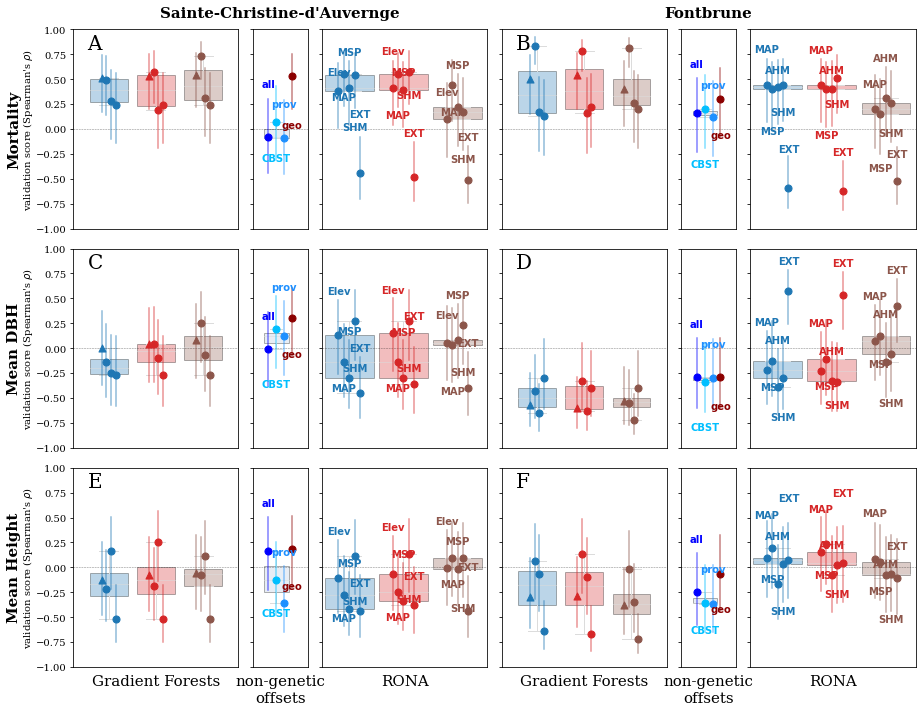

In [30]:
# create a nice lil fig
jp_fig(add_boxplot=True)

Saved to:  /lu213/brandon.lind/data/testdir/test_fig.pdf


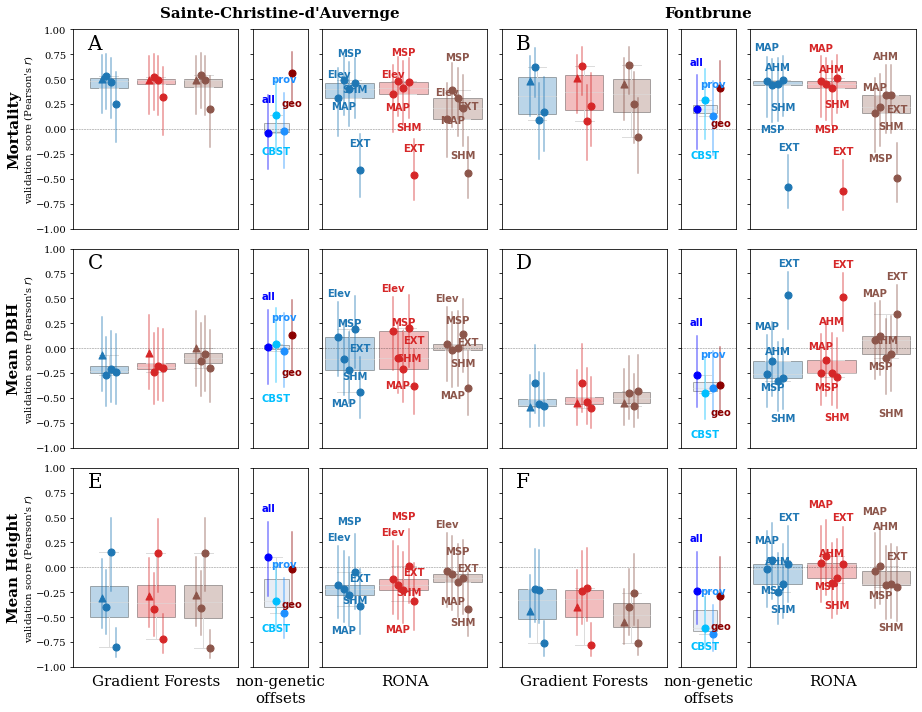

In [31]:
# create a nice lil fig
jp_fig(validation_stat='pearson', add_boxplot=True)

### CBST envs

Saved to:  /lu213/brandon.lind/data/testdir/test_fig.pdf


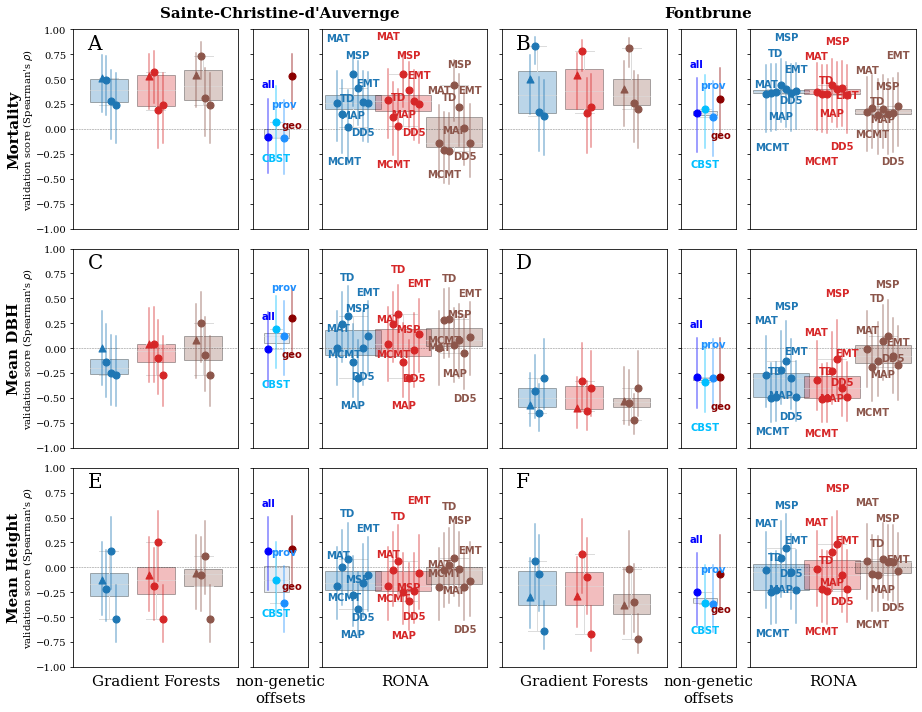

In [32]:
jp_fig(climate_set='CBST', add_boxplot=True)

Saved to:  /lu213/brandon.lind/data/testdir/test_fig.pdf


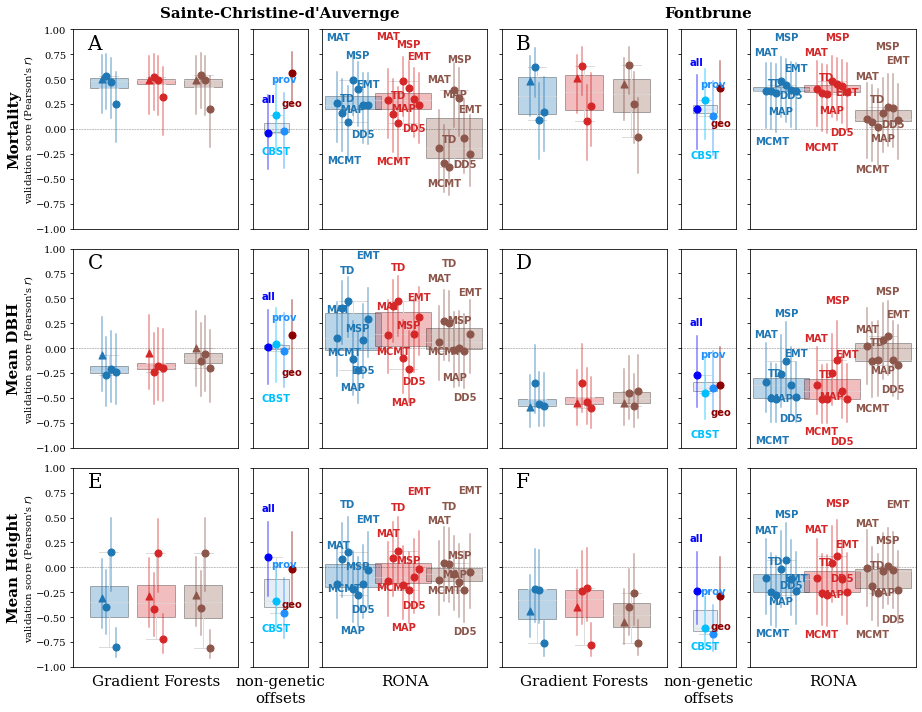

In [33]:
jp_fig(climate_set='CBST', validation_stat='pearson', add_boxplot=True)

### provenance trial envs

Saved to:  /lu213/brandon.lind/data/testdir/test_fig.pdf


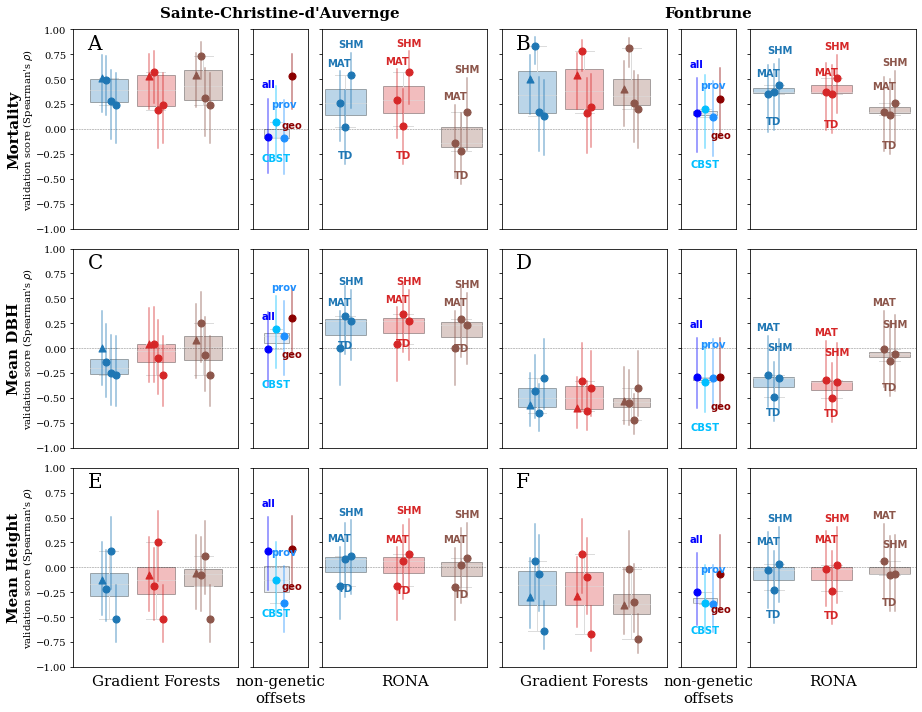

In [34]:
jp_fig(climate_set='provenance_trial', add_boxplot=True)

Saved to:  /lu213/brandon.lind/data/testdir/test_fig.pdf


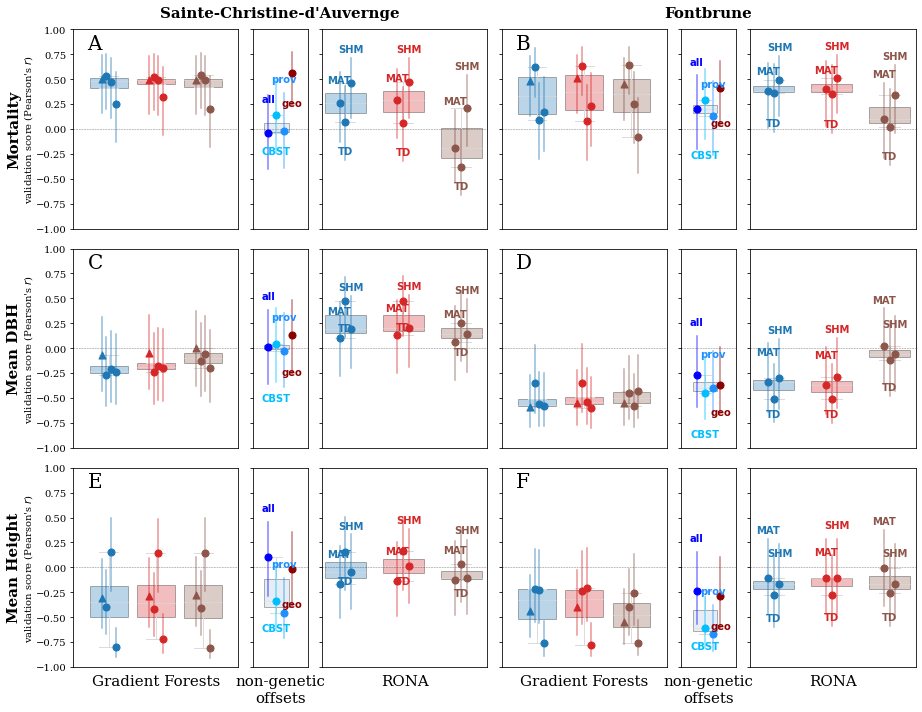

In [35]:
jp_fig(climate_set='provenance_trial', validation_stat='pearson', add_boxplot=True)

<a id='doug'></a>

# douglas-fir

[top](#home)

In [36]:
def setup_df_fig(first=True):
    if first is True:
        fig, axes = plt.subplots(nrows=3,
                                 ncols=3,
                                 sharey=True,
                                 gridspec_kw={'width_ratios': [3, 1, 2]},
                                 figsize=(13, 10))
    else:
        fig, axes = plt.subplots(nrows=1,
                                 ncols=4,
                                 sharey=True,
                                 gridspec_kw={'width_ratios': [2, 1, 2, 1]},
                                 figsize=(13, 2.5))
    
    return fig, axes


def df_fig(
    climate_set='canonical',
    pheno='blup_increment',
    validation_stat='spearman',
    focus=True,
    adjust=True,
    annotate=True,
    add_boxplot=False
):
    marker_sets = ['baypass-real', 'wza-real', 'wza-random'] if focus is True else keys(set_colors)
    
    # set up fig
    fig, axes = setup_df_fig(first=True)
    
    # set up global vars
    garden = 'vancouver'
    validation_level = ['Cross-variety', 'Coastal variety', 'Interior variety']
    env_list = []
    
    
    #### CROSS-VARIETY VALIDATION LEVEL ####
    # set up vars
    gf_ax, clim_ax, rona_ax = axes[0]
    spp = 'combined'
    envs = efdict[climate_set][spp][garden]
    env_list.append(envs)

    # get appropriate validation data
    rona_df = reduce_df(cordf, spp=spp, pheno=pheno, envs=envs)
    clim_df = reduce_df(climate_geodf, spp=spp, pheno=pheno, garden=garden)
    gf_df = reduce_df(validation_df, spp=spp, pheno=pheno, garden=garden)

    # phenotypic measurements - use to tally sample size for rho conf interval
    garden_phenos = phenodata[spp][garden][pheno]
    num_pops = garden_phenos.notnull().sum()

    # create gf plot
    plot_gradient_forests(
        gf_df, marker_sets, gf_ax, validation_stat, num_pops, add_boxplot=add_boxplot
    )
    
    # create climate/geo plot
    create_climgeo_fig(
        clim_df, num_pops, clim_ax, validation_stat, add_boxplot=add_boxplot
    )
    
    # create rona plot
    create_rona_fig(
        rona_df, marker_sets, num_pops, rona_ax, validation_stat, annotate=annotate, add_boxplot=add_boxplot
    )
    

    #### COASTAL and INTERIOR VARIETY VALIDATION LEVEL ####
    for row, spp in zip([1, 2], ['fdc', 'fdi']):
        gf_ax, clim_ax, rona_ax = axes[row]
        # GF plots
        for add, model in zip([0, 4], [f'{spp}-combined', spp]):
            # get appropriate validation data
            gf_df = reduce_df(validation_df, model=model, pheno=pheno)

            # phenotypic measurements - use to tally sample size for rho conf interval
            garden_phenos = phenodata[spp][garden][pheno]
            num_pops = garden_phenos.notnull().sum()
            
            # create gf plot
            plot_gradient_forests(
                gf_df, marker_sets, gf_ax, validation_stat, num_pops, add=add, add_boxplot=add_boxplot
            )
            
        # climate/geo
        clim_df = reduce_df(climate_geodf, spp=spp, pheno=pheno, garden=garden)
        create_climgeo_fig(
            clim_df, num_pops, clim_ax, validation_stat, add_boxplot=add_boxplot
        )
        
        # rona
        envs = efdict[climate_set][spp][garden]
        env_list.append(envs)
        rona_df = reduce_df(cordf, spp=spp, pheno=pheno, garden=garden, envs=envs)
        create_rona_fig(
            rona_df, marker_sets, num_pops, rona_ax, validation_stat, annotate=annotate, add_boxplot=add_boxplot
        )
        
        
    # clean up fig    
    panel_count = 0
    for row, row_axes in enumerate(axes):
        for ax_num, ax in enumerate(row_axes):
            ax.set_ylim(-1, 1)  # set ylim
            ax.yaxis.set_ticks(np.arange(-1, 1.25, 0.25))
            plt.setp(ax.get_yticklabels(), family='serif')  # set ytick font
            # clear x tick labels
            ax.set_xticks([-100])  # a tick that won't be shown in the figure, I have to set something
            ax.set_xticklabels([None])
            # set reference line at validation_stat = y = 0
            ax.axhline(y=0, linestyle='--', zorder=0, alpha=0.5, color='k', linewidth=0.5)
            
            # for the non-genetic offset subplots: second subplots
            if ax_num == 1:
                ax.set_xlim(-2, 5)
                if row == len(axes) - 1:
                    ax.set_xlabel('non-genetic\noffsets', fontdict=dict(family='serif', fontsize=15))

#                 # set column titles
#                 if row == 0:
#                     col = 0 if ax_num==1 else 1
#                     ax.set_title(
#                         label=garden_names[gardens[col]],
#                         pad=12,
#                         fontdict=dict(family='serif',
#                                       horizontalalignment='center',
#                                       weight='bold',
#                                       size=15)
#                     )

            # for the RONA subplots - 3rd subplots
            if ax_num == 2:
                envs = env_list[row]
                xmax = len(marker_sets)-1 + 0.1*len(envs) + 0.25
                ax.set_xlim(-0.30, xmax)
                if row == len(axes) - 1:
                    ax.set_xlabel('RONA', fontdict=dict(family='serif', fontsize=15))

            # add panel labels and set xlim for the GF subplots
            if ax_num == 0:
                if row == len(axes) - 1:
                    ax.set_xlabel('Gradient Forests', fontdict=dict(family='serif', fontsize=15))
                # set xlim
                xmin, xmax = ax.get_xlim()
                ax.set_xlim(xmin - 0.25, xmax + 0.25)
                # set panel label
                xmin, xmax = ax.get_xlim()
                xpos = xmin + (0.02 * (xmax - xmin))
                ax.text(
                    x=xpos, y=0.8, s=panel_labels[panel_count], fontdict=dict(family='serif', size=20)
                )
                panel_count += 1
            
            # adjust RONA-env and non-genetic labels as best I can so they don't overlap
            if adjust is True:
                annotations = [child for child in ax.get_children()
                               if isinstance(child, matplotlib.text.Annotation)]
                adjust_text(annotations, ax=ax, **adj_kwargs)
                
            # for the first plot of each row
            if ax_num == 0:
                # add y label
                ax.set_ylabel(pretty_label[validation_stat], labelpad=0.5, fontdict=dict(family='serif'))
                # add phenotype outside of ylabel
                xmin, xmax = ax.get_xlim()
                xpos = xmin - (0.17 * (xmax - xmin))
                ax.text(xpos, 0, validation_level[row], fontdict=dict(family='serif',
                                                                      rotation='vertical',
                                                                      verticalalignment='center',
                                                                      weight='bold',
                                                                      size=15))  # add pheno label
        
        
    plt.tight_layout()
    
    if saveloc is True:
        focussed = 'focus' if focus is True else 'all-markers'
        boxplots = 'boxplots' if add_boxplot is True else 'no-boxplot'
        saveloc = op.join(figdir,
                          f'df_{climate_set}_{pheno}_{validation_stat}_{focussed}_{boxplots}_upper.pdf')
        save_pdf(saveloc)
    
    plt.show()
    
    # now make the sub-interior figure ...
    
    pass


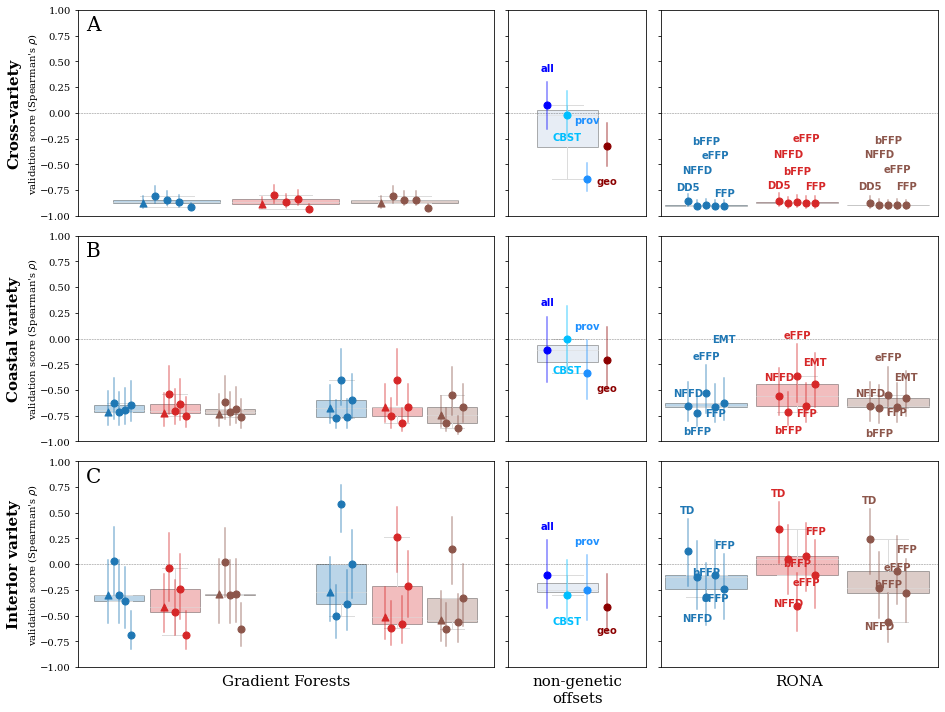

In [37]:
df_fig(climate_set='canonical', add_boxplot=True)

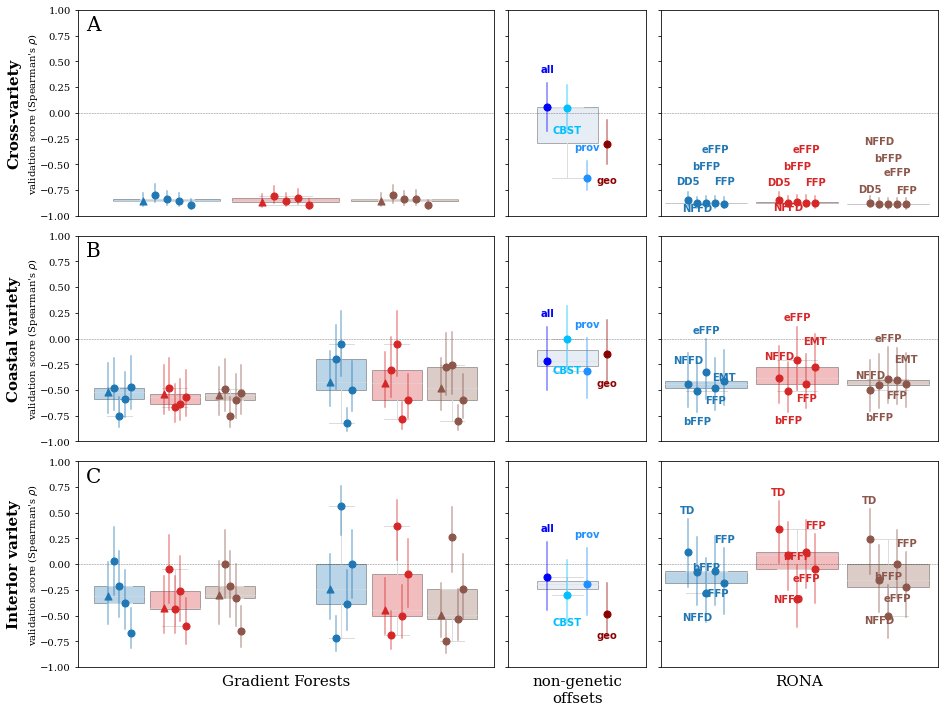

In [38]:
df_fig(climate_set='canonical', pheno='blup_shoot_biomass', add_boxplot=True)

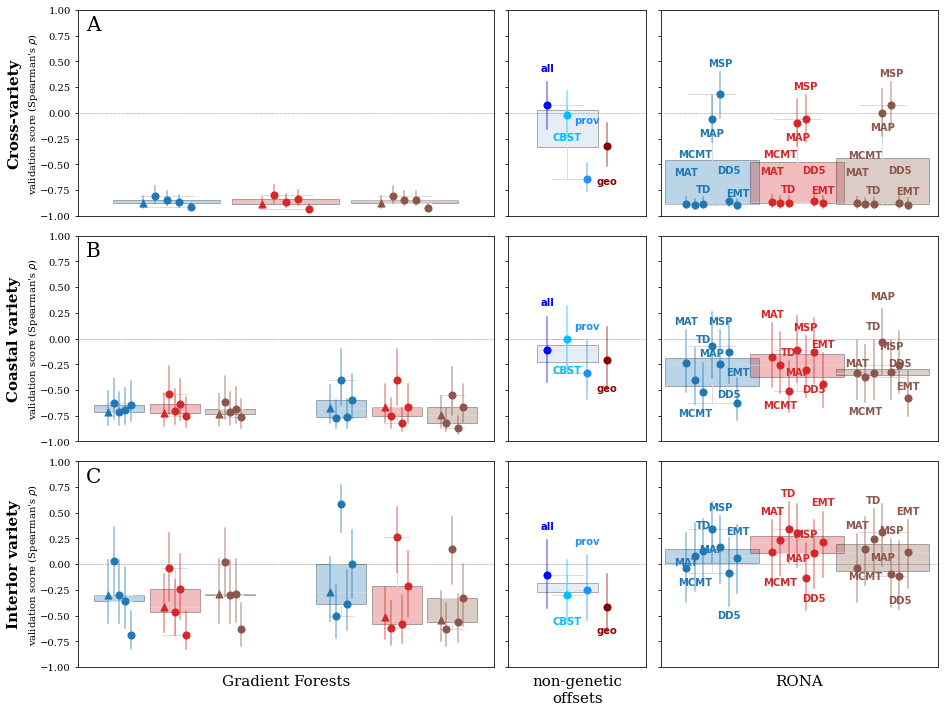

In [39]:
df_fig(climate_set='CBST', add_boxplot=True)

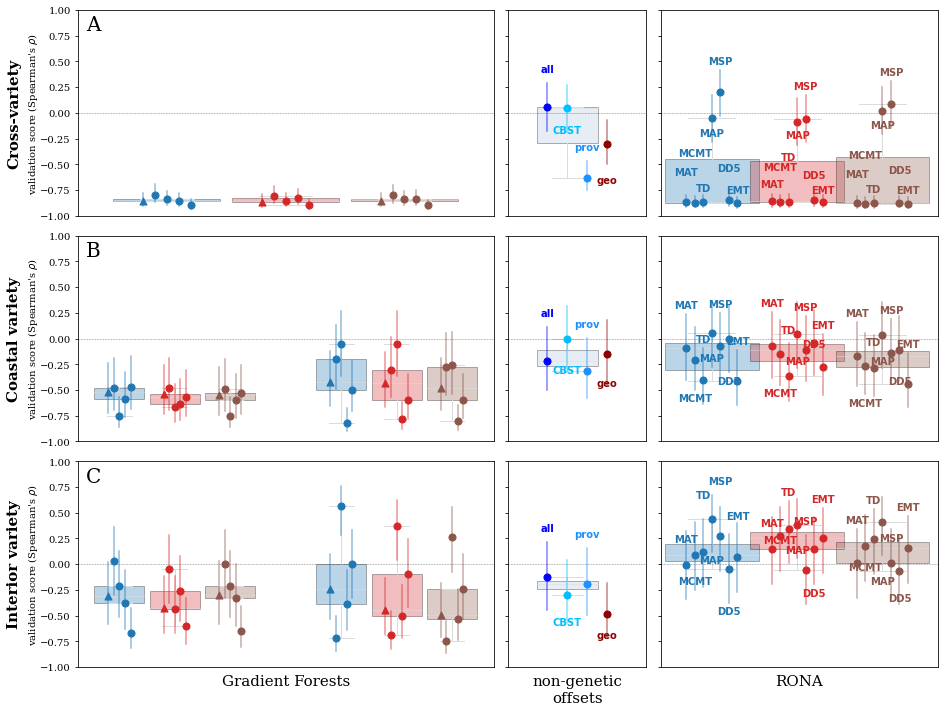

In [40]:
df_fig(climate_set='CBST', pheno='blup_shoot_biomass', add_boxplot=True)

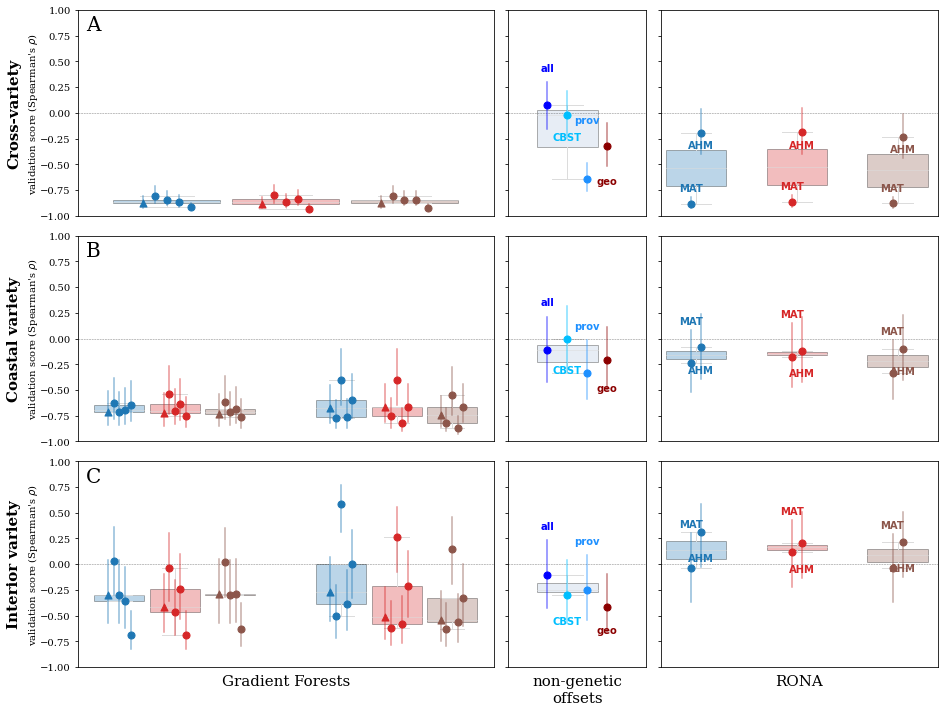

In [41]:
df_fig(climate_set='provenance_trial', add_boxplot=True)

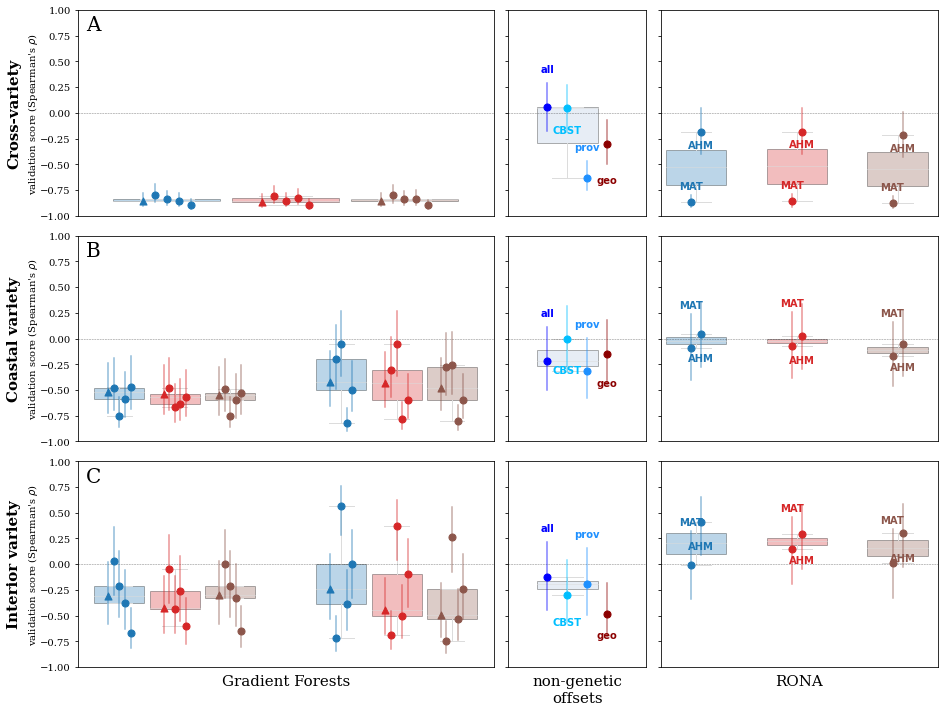

In [42]:
df_fig(climate_set='provenance_trial', pheno='blup_shoot_biomass', add_boxplot=True)

In [ ]:
formatclock(dt.now() - t1, exact=True)